In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')#
%matplotlib inline
#To place the content properly in the notebook

# CSV files for World Dataset

In [2]:
confirmed_df = pd.read_csv('confirm_1.csv')
deaths_df = pd.read_csv('confirm_2.csv')
recoveries_df = pd.read_csv('confirm_3.csv')

# CSV files for Karnataka Dataset


In [3]:
confirmed_df_kar = pd.read_csv('total_casesAPRIL.csv')
deaths_df_kar = pd.read_csv('death_cases_APRIL.csv')
recoveries_df_kar = pd.read_csv('recovered_cases_APRIL.csv')

# Details of the CSV files consisting World Data on Covid-19


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,964,969,981,989,998,1004,1029,1050,1076,1099
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,762,763,763,763,763,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,52,58,60,61,69,70,70,71,74,81


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,187,193,205,216,218,219,220,227,235,246
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,32,32,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,568,575,582,592,600,609,617,623,630,638
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,3,4,4,4,4,4,4,4


In [6]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,930,938,996,1040,1075,1097,1128,1138,1209,1259
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,758,771,777,783,789,795,803,812,823,851
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,639,639,652,653,653,663,676,676,681,684
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,17,17,18,18,18,18,18,18,18


# Details of the CSV files consisting Karnataka data on Covid-19

In [7]:
confirmed_df_kar.head()

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,4,8,11,15,20,33,44,52,...,1605,1743,1959,2089,2182,2283,2418,2533,2781,2925


In [8]:
deaths_df_kar.head()

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,0,0,0,0,0,1,1,2,...,41,41,42,42,44,44,47,49,49,49


In [9]:
recoveries_df_kar.head()

,Unnamed: 0,04/01/2020,04/02/2020,04/03/2020,04/04/2020,04/05/2020,04/06/2020,04/07/2020,04/08/2020,04/09/2020,...,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020,05/29/2020,05/30/2020,05/31/2020
0,KARNATAKA,0,0,1,1,1,1,2,3,4,...,571,597,608,654,705,748,781,834,894,997


# Reading column values from World Dataset

In [10]:
cols = confirmed_df.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/20', '5/21/20', '5/22/20', '5/23/20', '5/24/20', '5/25/20',
       '5/26/20', '5/27/20', '5/28/20', '5/29/20'],
      dtype='object', length=133)


# Reading column values from Karnataka Dataset

In [11]:
cols_kar = confirmed_df_kar.keys()
print(cols_kar)

Index(['Unnamed: 0', '04/01/2020', '04/02/2020', '04/03/2020', '04/04/2020',
       '04/05/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020',
       '04/10/2020', '04/11/2020', '04/12/2020', '04/13/2020', '04/14/2020',
       '04/15/2020', '04/16/2020', '04/17/2020', '04/18/2020', '04/19/2020',
       '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020',
       '04/25/2020', '04/26/2020', '04/27/2020', '04/28/2020', '04/29/2020',
       '04/30/2020', '05/01/2020', '05/02/2020', '05/03/2020', '05/04/2020',
       '05/05/2020', '05/06/2020', '05/07/2020', '05/08/2020', '05/09/2020',
       '05/10/2020', '05/11/2020', '05/12/2020', '05/13/2020', '05/14/2020',
       '05/15/2020', '05/16/2020', '05/17/2020', '05/18/2020', '05/19/2020',
       '05/20/2020', '05/21/2020', '05/22/2020', '05/23/2020', '05/24/2020',
       '05/25/2020', '05/26/2020', '05/27/2020', '05/28/2020', '05/29/2020',
       '05/30/2020', '05/31/2020'],
      dtype='object')


# Reading only the Indian data from the entire dataset

In [12]:
confirmed = confirmed_df.loc[131, cols[4]:cols[-1]]
deaths = deaths_df.loc[131:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[131:, cols[4]:cols[-1]]

# Reading the karnataka data from the dataset

In [13]:
confirmed_kar = confirmed_df_kar.loc[0, cols_kar[1]:cols_kar[-1]]
deaths_kar = deaths_df_kar.loc[0, cols_kar[1]:cols_kar[-1]]
recoveries_kar = recoveries_df_kar.loc[0, cols_kar[1]:cols_kar[-1]]

# Iterating through the number of cases in entire India and finding the total number of cases

In [14]:
dates = confirmed.keys()
india_cases= []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

india_cases = [] 


india_deaths = []


india_recoveries = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    india_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)


c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars
c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in longlong_scalars


# Iterating through all the cases in Karnataka

In [15]:
dates_kar = confirmed_kar.keys()
kar_cases= []
total_deaths_kar = [] 
mortality_rate_kar = []
recovery_rate_kar = [] 
total_recovered_kar = [] 
total_active_kar = [] 

karnataka_cases = [] 


karnataka_deaths = []


karnataka_recoveries = [] 


for i in dates_kar:
    confirmed_sum_kar = confirmed_kar[i].sum()
    death_sum_kar = deaths_kar[i].sum()
    recovered_sum_kar = recoveries_kar[i].sum()
    
    # confirmed, deaths, recovered, and active
    kar_cases.append(confirmed_sum_kar)
    total_deaths_kar.append(death_sum_kar)
    total_recovered_kar.append(recovered_sum_kar)
    total_active_kar.append(confirmed_sum_kar-death_sum_kar-recovered_sum_kar)
    
    # calculate rates
    mortality_rate_kar.append(death_sum/confirmed_sum)
    recovery_rate_kar.append(recovered_sum/confirmed_sum)


# Getting daily increases in India 

In [16]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
india_daily_increase = daily_increase(india_cases)


# deaths
india_daily_death = daily_increase(total_deaths)


# recoveries
india_daily_recovery = daily_increase(total_recovered)


# Getting daily increases in Karnataka

In [17]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            #d.append(data[0])
            i=i+0
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
kar_daily_increase = daily_increase(kar_cases)


# deaths
kar_daily_death = daily_increase(total_deaths_kar)


# recoveries
kar_daily_recovery = daily_increase(total_recovered_kar)


In [18]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
india_cases = np.array(india_cases).reshape(-1, 1)#-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis
total_deaths = np.array(total_deaths).reshape(-1, 1)#converts to a 1X1 matrix 
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [19]:
days_since_04_01 = np.array([i for i in range(len(dates_kar))]).reshape(-1, 1)
kar_cases = np.array(kar_cases).reshape(-1, 1)#-1 in reshape function is used when you dont know or want to explicitly tell the dimension of that axis
total_deaths_kar = np.array(total_deaths_kar).reshape(-1, 1)#converts to a 1X1 matrix 
total_recovered_kar = np.array(total_recovered_kar).reshape(-1, 1)

# Future forcasting for India

In [20]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

# Future forcasting for karnataka

In [21]:
days_in_future_kar = 10
future_forcast_kar = np.array([i for i in range(len(dates_kar)+days_in_future_kar)]).reshape(-1, 1)
adjusted_dates_kar = future_forcast_kar[:-10]

# Convert integer into date-time for better visualization

In [22]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
start = '04/01/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates_kar = []
for i in range(len(future_forcast_kar)):
    future_forcast_dates_kar.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Splitting the data from the Indian data for testing and training

In [24]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_cases, test_size=0.30, shuffle=False) 

# Splitting the data for training and testing - Karnataka data

In [25]:
X_train_confirmed_kar, X_test_confirmed_kar, y_train_confirmed_kar, y_test_confirmed_kar = train_test_split(days_since_04_01, kar_cases, test_size=0.40, shuffle=False)

# Using Polynomial regressor on India Dataset

In [27]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
#print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
linear_model.score(poly_X_test_confirmed,y_test_confirmed)*100

98.5608437007727

# Using SVM on India Dataset

In [28]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
#print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
#print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))
svm_confirmed.score(X_test_confirmed,y_test_confirmed)*100

c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


96.06742731733604

# Using Polynomial regressor on Karnataka Dataset

In [33]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed_kar = poly.fit_transform(X_train_confirmed_kar)
poly_X_test_confirmed_kar = poly.fit_transform(X_test_confirmed_kar)
poly_future_forcast_kar = poly.fit_transform(future_forcast_kar)

# polynomial regression
linear_model_kar =LinearRegression(normalize=True, fit_intercept=False)
linear_model_kar.fit(poly_X_train_confirmed_kar, y_train_confirmed_kar)
test_linear_pred_kar = linear_model_kar.predict(poly_X_test_confirmed_kar)
linear_pred_kar = linear_model_kar.predict(poly_future_forcast_kar)
#print('MAE:', mean_absolute_error(test_linear_pred_kar, y_test_confirmed_kar))
#print('MSE:',mean_squared_error(test_linear_pred_kar, y_test_confirmed_kar))
linear_model_kar.score(poly_X_test_confirmed_kar,y_test_confirmed_kar)

0.9771204069847605

# Using SVM on Karnataka Dataset

In [34]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed_kar = SVR(kernel='poly',gamma=0.0085, epsilon=1,degree=3, C=0.09)
svm_confirmed_kar.fit(X_train_confirmed_kar, y_train_confirmed_kar)
svm_pred_kar = svm_confirmed_kar.predict(future_forcast_kar)

# check against testing data
svm_test_pred_kar = svm_confirmed_kar.predict(X_test_confirmed_kar)
#print('MAE:', mean_absolute_error(svm_test_pred_kar, y_test_confirmed_kar))
#print('MSE:',mean_squared_error(svm_test_pred_kar, y_test_confirmed_kar))
svm_confirmed_kar.score(X_test_confirmed_kar,y_test_confirmed_kar)*100

c:\users\ramesh babu\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


93.5392373978167

# Function to print graph

In [81]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Final predictions at India level

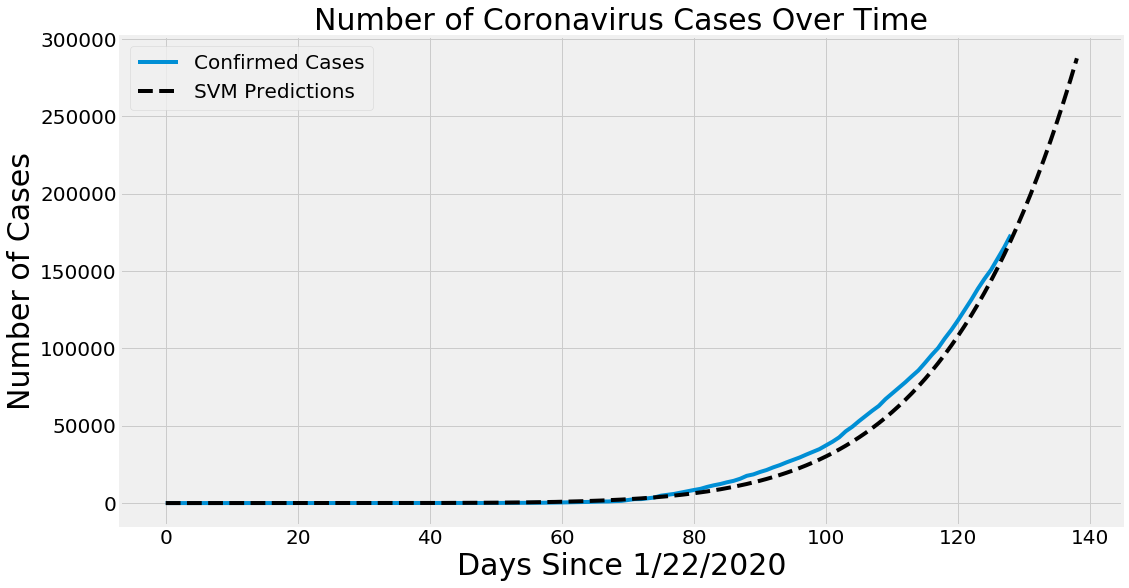

In [82]:
plot_predictions(adjusted_dates, india_cases, svm_pred, 'SVM Predictions', 'black')

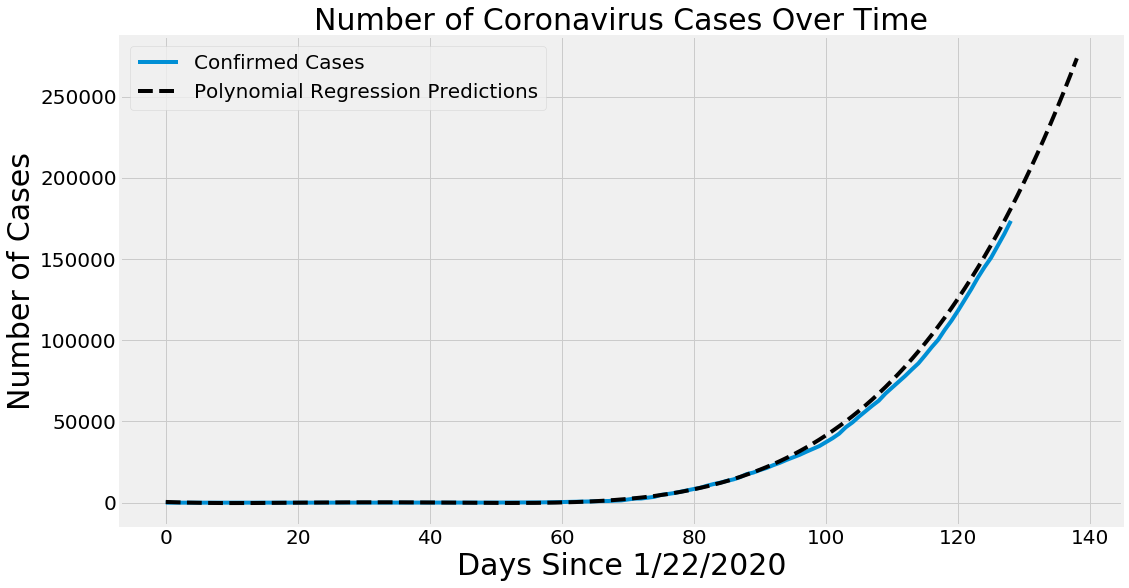

In [83]:
plot_predictions(adjusted_dates, india_cases, linear_pred, 'Polynomial Regression Predictions', 'black')

In [35]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases in India': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted # of Confirmed Cases in India
0,05/30/2020,179361.0
1,05/31/2020,189323.0
2,06/01/2020,199756.0
3,06/02/2020,210677.0
4,06/03/2020,222107.0
5,06/04/2020,234064.0
6,06/05/2020,246568.0
7,06/06/2020,259641.0
8,06/07/2020,273303.0
9,06/08/2020,287577.0


In [36]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases in India': np.round(linear_pred[-10:])})
svm_df

,Date,Polynomial Predicted # of Confirmed Cases in India
0,05/30/2020,189133.0
1,05/31/2020,197407.0
2,06/01/2020,205945.0
3,06/02/2020,214753.0
4,06/03/2020,223836.0
5,06/04/2020,233200.0
6,06/05/2020,242850.0
7,06/06/2020,252792.0
8,06/07/2020,263033.0
9,06/08/2020,273576.0


# Function to plot graph

In [86]:
def plot_predictions_kar(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forcast_kar, pred, linestyle='dashed', color=color)
    plt.title('Cases of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 04/01/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Final predictions at Karnataka level

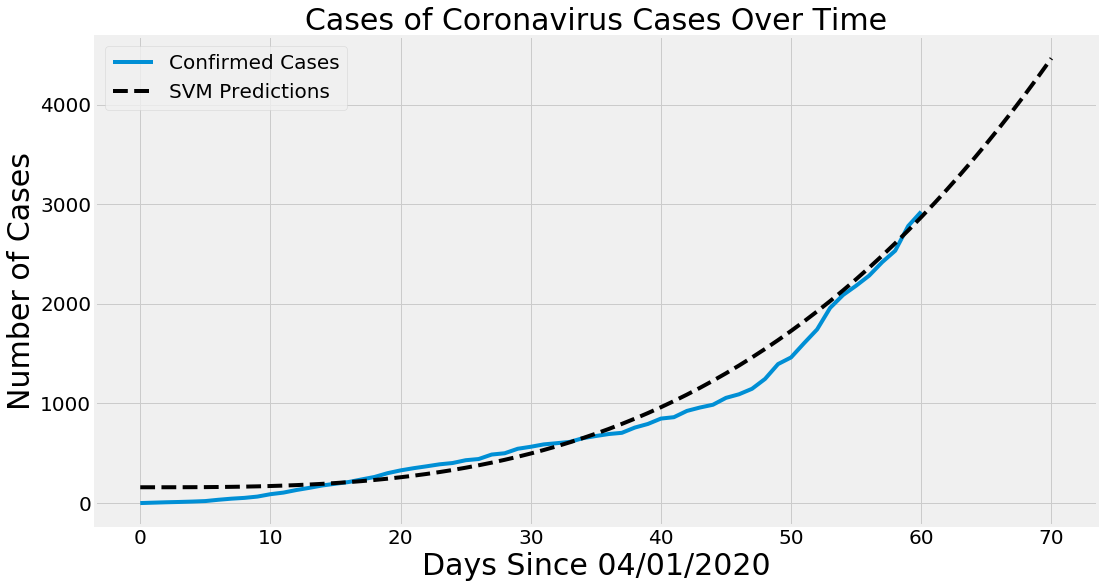

In [96]:
plot_predictions_kar(adjusted_dates_kar, kar_cases, svm_pred_kar, 'SVM Predictions', 'black')

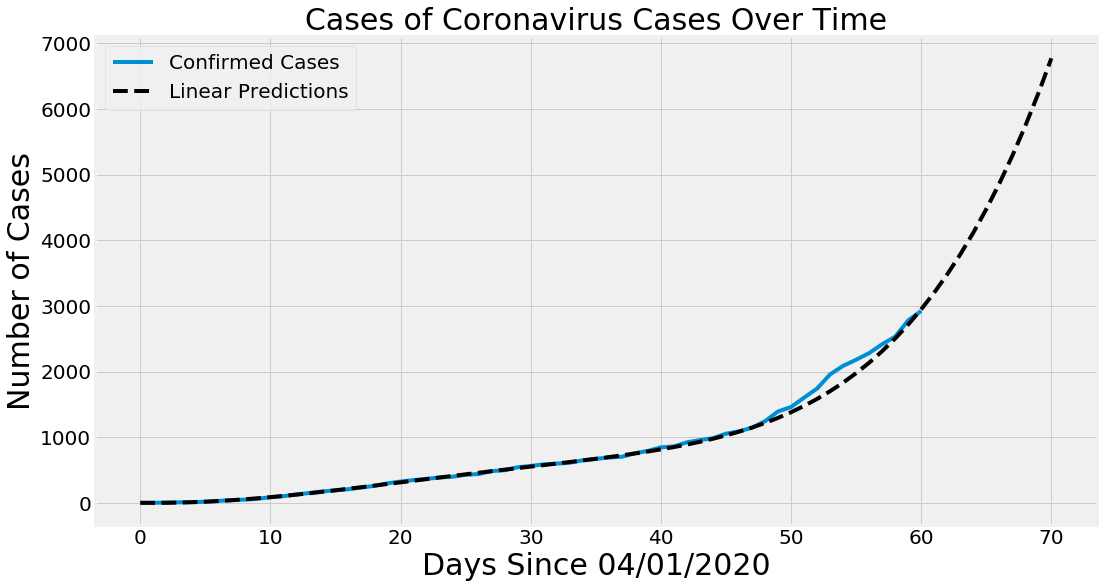

In [88]:
plot_predictions_kar(adjusted_dates_kar, kar_cases, linear_pred_kar, 'Linear Predictions', 'black')

In [97]:
# Future predictions using SVM 
svm_df_kar = pd.DataFrame({'Date': future_forcast_dates_kar[-10:], 'SVM Predicted # of Confirmed Cases in Karnataka State': np.round(svm_pred_kar[-10:])})
svm_df_kar

,Date,SVM Predicted # of Confirmed Cases in Karnataka State
0,06/01/2020,3008.0
1,06/02/2020,3151.0
2,06/03/2020,3298.0
3,06/04/2020,3450.0
4,06/05/2020,3606.0
5,06/06/2020,3768.0
6,06/07/2020,3934.0
7,06/08/2020,4106.0
8,06/09/2020,4283.0
9,06/10/2020,4465.0


In [90]:
# Future predictions using polynomial regression
linear_pred_kar = linear_pred_kar.reshape(1,-1)[0]
svm_df_kar = pd.DataFrame({'Date': future_forcast_dates_kar[-10:], 'Polynomial Predicted # of Confirmed Cases in Karnataka State': np.round(linear_pred_kar[-10:])})
svm_df_kar

,Date,Polynomial Predicted # of Confirmed Cases in Karnataka State
0,06/01/2020,3204.0
1,06/02/2020,3482.0
2,06/03/2020,3785.0
3,06/04/2020,4116.0
4,06/05/2020,4475.0
5,06/06/2020,4864.0
6,06/07/2020,5287.0
7,06/08/2020,5744.0
8,06/09/2020,6238.0
9,06/10/2020,6771.0


# THANK YOU..